n: 10  , k: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
M.shpe: (160,)
y.shape: (160,)
y.reshape: (160, 1)
M.shape: (160, 1)
y.shape: (160,)
y.reshape: (160, 1)
M.shape: (160, 1)
y.shape: (160,)
y.reshape: (160, 1)
M.shape: (160, 1)
y.shape: (160,)
y.reshape: (160, 1)
M.shape: (160, 1)
y.shape: (160,)
y.reshape: (160, 1)
M.shape: (160, 1)
y.shape: (160,)
y.reshape: (160, 1)
M.shape: (160, 1)
y.shape: (160,)
y.reshape: (160, 1)
M.shape: (160, 1)
y.shape: (160,)
y.reshape: (160, 1)
M.shape: (160, 1)
y.shape: (160,)
y.reshape: (160, 1)
M.shape: (160, 1)
y.shape: (160,)
y.reshape: (160, 1)
M.shape: (160, 1)
spec.shape[1]: 160


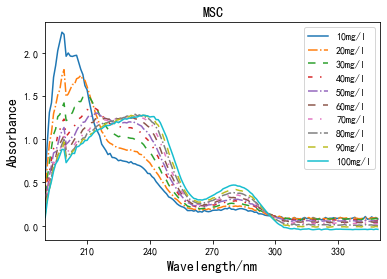

spec.shape[1]: 160


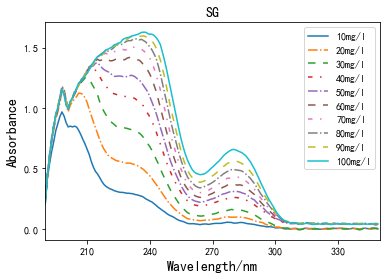

spec.shape[1]: 160


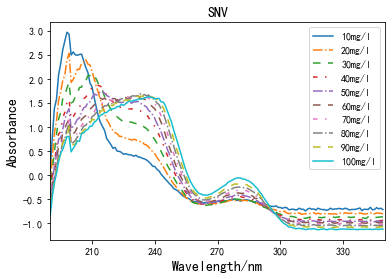

spec.shape[1]: 160


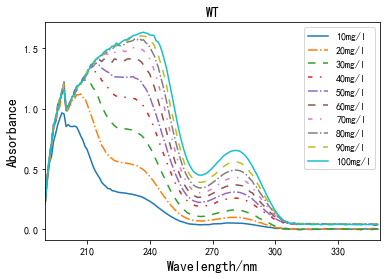

spec.shape[1]: 160


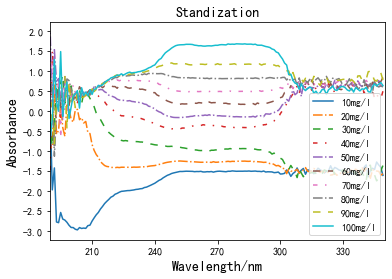

spec.shape[1]: 160


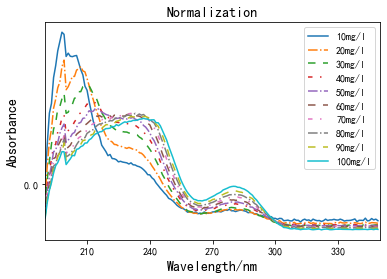

In [1]:
# 2023年2月20日尝试对自己的光谱数据进行处理
import pandas as pd
import numpy as np

data_cod = pd.read_csv('./data/larger_wavelength_xy.csv')
data_cod.values
# 第一列是对应的cod浓度值为目标值，我们只需要获取对应的指标就好
data_x = data_cod.values[:, 1:]
# print("data_x.shape:", data_x.shape)
# print("data_x[0, :]:", data_x[0, :].shape)
# 导入预处理包
from pretreatment import Pretreatment as pre
p = pre()

# 1. 测试用例 图片名 波段起始点 波段间距
# p.PlotSpectrum2(data_x).show()

# 2. 标准正态变换
msc = p.msc(data_x)
msc.shape # 只要保证我们输入的维度是10x160，应该就可以保证我们正确加载
# msc多元散射校正
# p.PlotSpectrum2(msc, "多元散射校正").show()
p.PlotSpectrum2_english(msc, "MSC").show()
# 3. 一阶差分D1
# d1 = p.D1(data_x)
# d1.shape
# p.PlotSpectrum2(d1, "一阶差分").show()
# 4. sg平滑处理 Savitzky-Golay平滑滤波函数 SG
sg = p.SG(data_x)
# p.PlotSpectrum2(sg, "Savitzky-Golay平滑滤波").show()
p.PlotSpectrum2_english(sg, "SG").show()

# 5. rsnv
rsnv = p.snv(data_x)
# p.PlotSpectrum2(rsnv, "标准正态变换").show()
p.PlotSpectrum2_english(rsnv, "SNV").show()

# 6. wave
rwave = p.wave(data_x)
# p.PlotSpectrum2(rwave, "小波变换").show()
p.PlotSpectrum2_english(rwave, "WT").show()

# m_center = p.mean_centralization(data_x)
# p.PlotSpectrum2(m_center, "m_center").show()

# standize = p.standardlize(data_x)
# p.PlotSpectrum2(standize, "标准化").show()


# 7.尝试将已经光滑处理的数据传入到标准化处理函数中
# standize2 = p.standardlize(sg)
# p.PlotSpectrum2(standize2, "标准化2").show()

# 8.把小波变换处理后的数据传入到标准化处理函数中
standize3 = p.standardlize(rwave)
# p.PlotSpectrum2(standize3, "标准化standardlize").show()
p.PlotSpectrum2_english(standize3, "Standization").show()
# rmove_avg = p.move_avg(data_x)
# p.PlotSpectrum2(rmove_avg, '滑动平均滤波').show()
# 
rvector_normalization = p.vector_normalization(data_x)
# p.PlotSpectrum2(rvector_normalization, '矢量归一化').show()
p.PlotSpectrum2_english(rvector_normalization, "Normalization").show()

In [10]:
# 尝试在该路径下创建新文件夹
from datetime import date,timedelta
def getDateStr(n=0):
    ds = date.today() + timedelta(n)
    return '%4d%2.2d%2.2d' % (ds.year,ds.month,ds.day)
import os
file_name = "./graph_result/" + getDateStr(0)
if os.path.exists(file_name):
    print(file_name+"文件夹已存在")
else:
    os.mkdir(file_name)

In [40]:
# 2023年3月3日尝试将array类型保存到文件中
# msc
import numpy as np
import pandas as pd
df_msc = pd.DataFrame(msc)
idx = list(range(10, 110, 10))
head = list(range(349, 189, -1))
# 这种方法不一定成功
df_msc1 = pd.DataFrame(df_msc, index=idx)
# 为何感觉每次添加索引失败？因为reindex不是就地操作，
# 处理后会返回一个新的变量，所以。
# df_msc.reindex(idx)
# df_msc = df_msc.reindex(idx) # 接受返回结果
df_msc1
# df_msc1.to_csv('./df_msc_20230303.csv')
# head

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# 将处理后的光谱返回保存到csv中
import numpy as np
import pandas as pd
df_msc = pd.DataFrame(msc)
# 添加行索引
idx = list(range(10, 110, 10))
head = list(range(349, 189, -1))
df_msc.index = idx
# 更改列表
df_msc.columns = head
df_msc
df_msc.to_csv('./df_msc_20230303.csv')

In [1]:
# 将处理后的光谱返回保存到csv中并定义成函数
import numpy as np
import pandas as pd
import datetime
def save_pretreatment_data(pre_result, name):
    df_result = pd.DataFrame(pre_result)
    # 添加行索引
    idx = list(range(10, 110, 10))
    head = list(range(349, 189, -1))
    df_result.index = idx
    # 更改列名
    df_result.columns = head
    df_result
    date = datetime.date.today()
    file_name = name + str(date)
    df_result.to_csv('./'+file_name+'.csv')
# 依次将每种方法获取得到的数据保存到csv文件中
methods = [msc,sg,rsnv,rwave,standize3,rvector_normalization]
name = ["msc","sg","rsnv","rwave","standize3","rvector_normalization"]
for i in range(len(methods)):
    save_pretreatment_data(methods[i], name[i])
print("结束")

NameError: name 'msc' is not defined

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. 导入数据


In [1]:
# 导入 pandas 读取数据
import pandas as pd
import numpy as np

# 读取数据
data = pd.read_csv("./data/peach_spectra_brix.csv")

# m * n 
print("数据矩阵 data.shape：",data.shape)

# 50个样本， 600个 波段 第一列是 桃子糖度值 需要分离开
X = data.values[:,1:] 

数据矩阵 data.shape： (50, 601)




## 2. 数据绘制



spec.shape[1]: 600


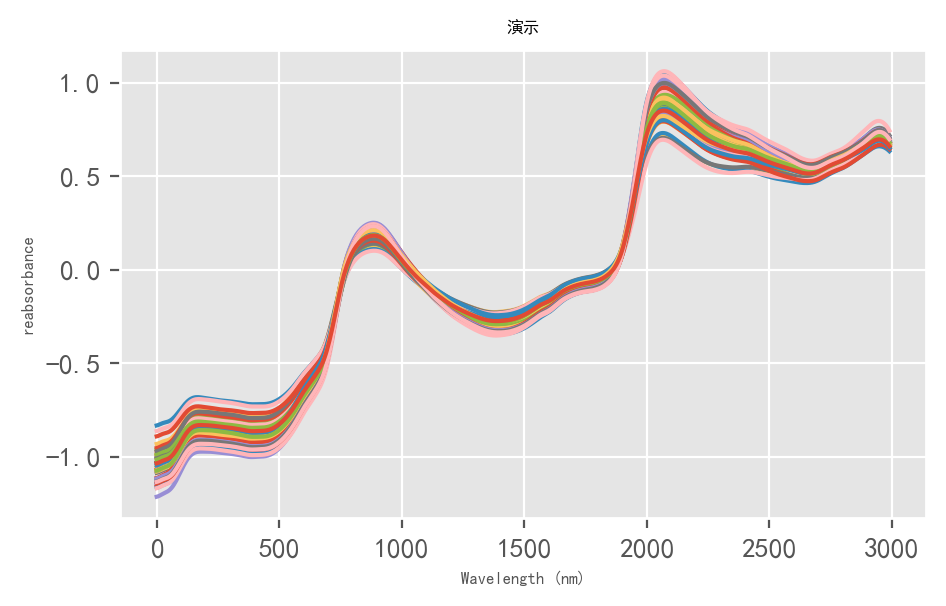

numpy.ndarray

In [2]:
from pretreatment import Pretreatment as pre
p = pre()

# 该方法为快速示例 而编写 
# 测试用例 图片名 波段起始点 波段间距
p.PlotSpectrum(X, '演示', 0, 5).show()
## 为保证数据可以正确绘制 请将 矩阵转化为 numpy.ndarray 格式
type(X)



## 3. 数据预处理

### 标准正态变换 MSC



n: 50  , k: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
M.shpe: (600,)
y.shape: (600,)
y.reshape: (600, 1)
y: [[-1.03235522e+00]
 [-1.03055086e+00]
 [-1.02796982e+00]
 [-1.02493714e+00]
 [-1.02186577e+00]
 [-1.01914278e+00]
 [-1.01686648e+00]
 [-1.01490958e+00]
 [-1.01290682e+00]
 [-1.01053187e+00]
 [-1.00746293e+00]
 [-1.00355300e+00]
 [-9.98692411e-01]
 [-9.92880601e-01]
 [-9.86095129e-01]
 [-9.78415121e-01]
 [-9.69976992e-01]
 [-9.60966478e-01]
 [-9.51527289e-01]
 [-9.41861705e-01]
 [-9.32115735e-01]
 [-9.22482874e-01]
 [-9.13119507e-01]
 [-9.04230619e-01]
 [-8.95957379e-01]
 [-8.88437712e-01]
 [-8.81759873e-01]
 [-8.75965616e-01]
 [-8.71050498e-01]
 [-8.67025962e-01]
 [-8.63835639e-01]
 [-8.61448083e-01]
 [-8.59782077e-01]
 [-8.58781105e-01]
 [-8.58343813e-01]
 [-8.58336348e-01]
 [-8.58626885e-01]
 [-8.59110927e-01]
 [-8.59662623e-01]
 [-8.60227514e-01]
 [-8.60760991e-01]
 

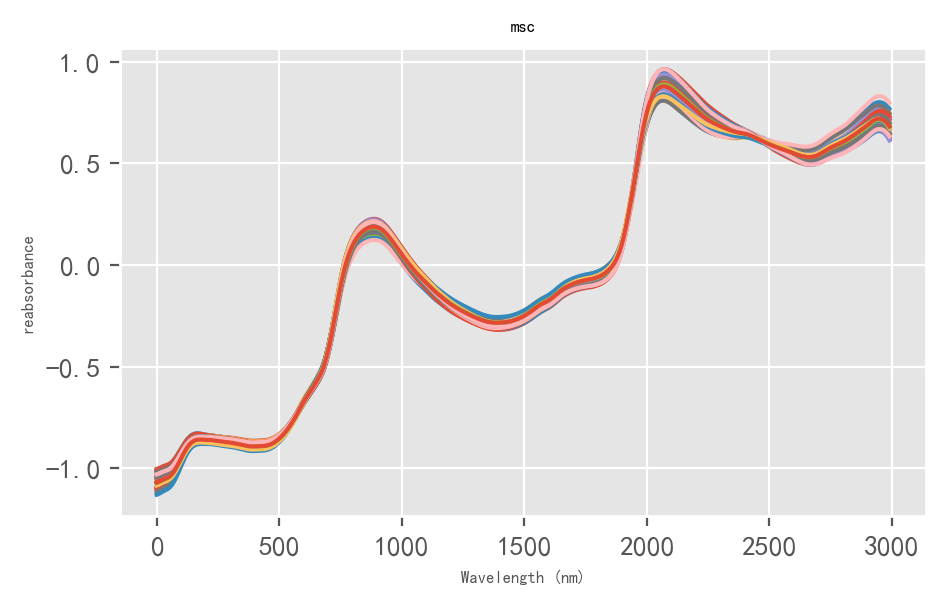

In [3]:
# 2023年2月19日尝试了解清楚求MSC的原理
# 还可以参考https://blog.csdn.net/yezifan1996/article/details/115307355
msc = p.msc(X)
p.PlotSpectrum(msc, 'msc', 0, 5).show()



### 多元散射校正 SNV




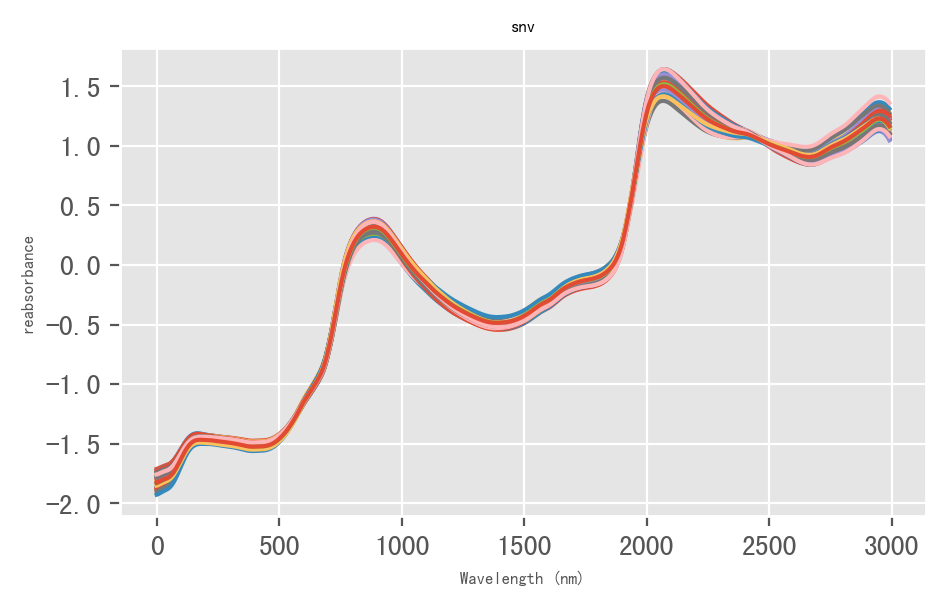

In [4]:
snv = p.snv(X)
p.PlotSpectrum(snv, 'snv', 0, 5).show()



### Savitzky-Golay平滑滤波函数 SG



<function matplotlib.pyplot.show(close=None, block=None)>

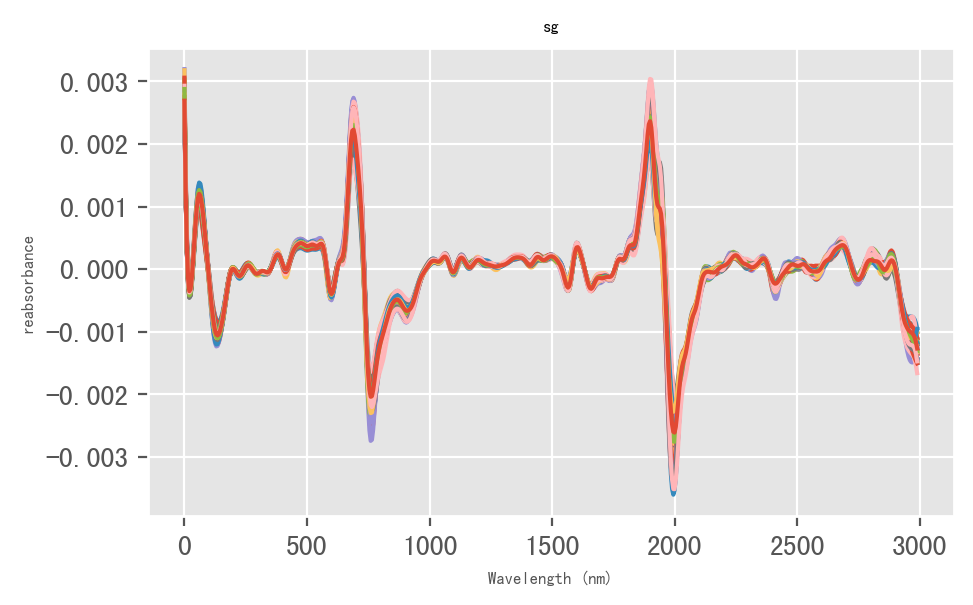

In [5]:
# 此处参数为参考 具体 后续 详述
sg = p.SG(X, 4*5+1,2*3,2)
p.PlotSpectrum(sg, 'sg', 0, 5).show





### 滑动平均滤波 move_avg




<function matplotlib.pyplot.show(close=None, block=None)>

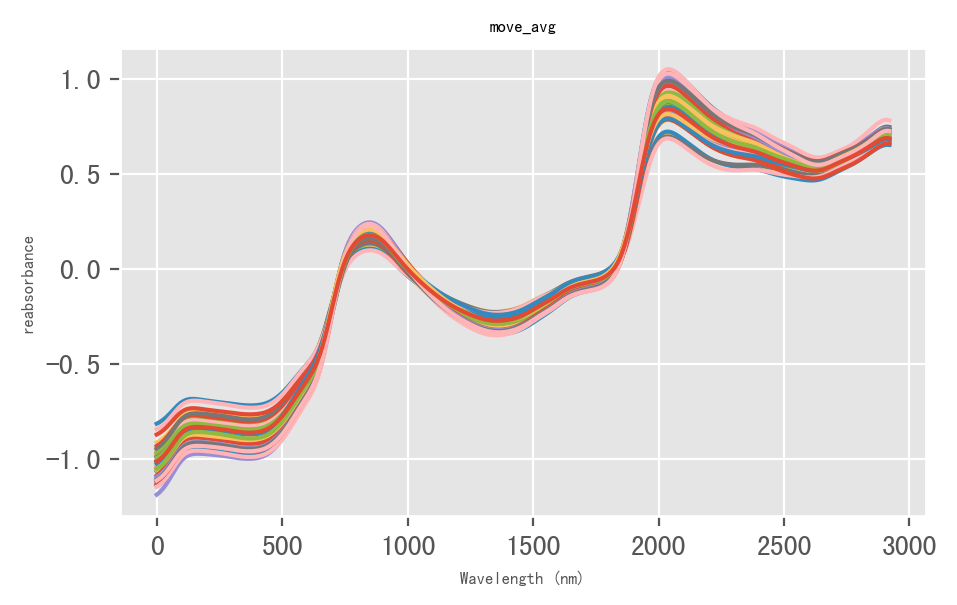

In [6]:
move_avg = p.move_avg(X)
p.PlotSpectrum(move_avg, 'move_avg', 0, 5).show




### 一阶差分 D1




<function matplotlib.pyplot.show(close=None, block=None)>

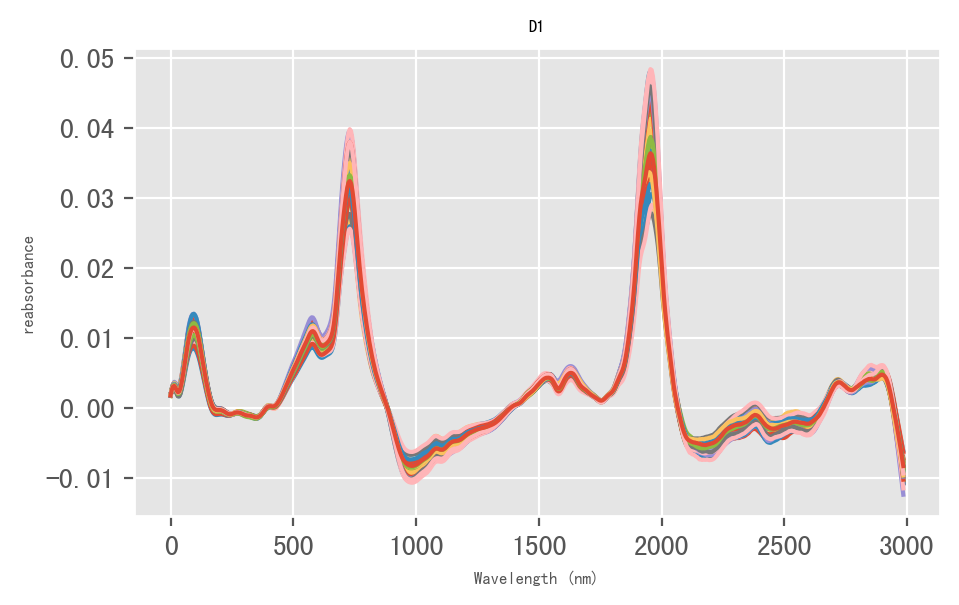

In [7]:
D1 = p.D1(X)
p.PlotSpectrum(D1, 'D1', 0, 5).show



### 二阶差分 D2





<function matplotlib.pyplot.show(close=None, block=None)>

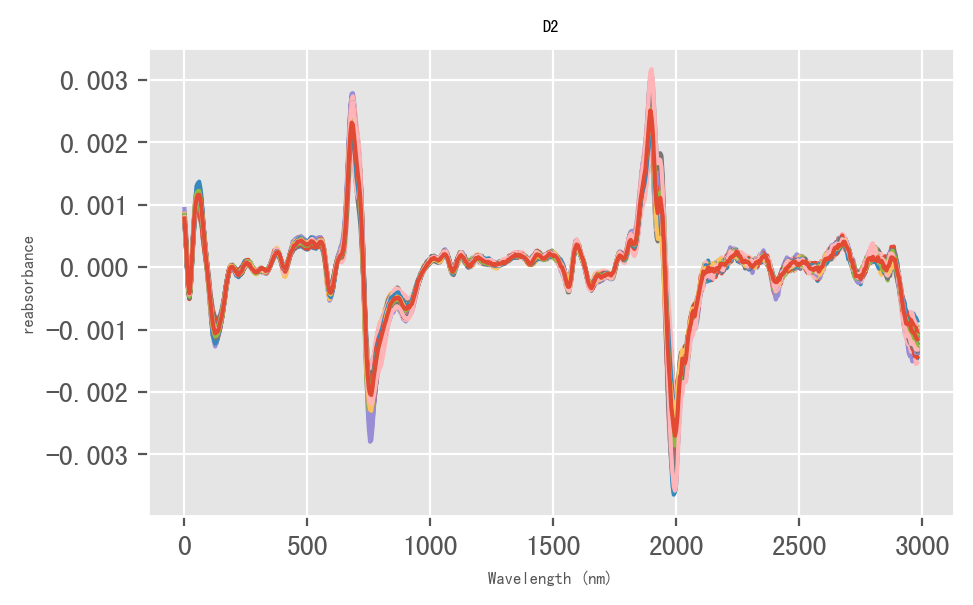

In [8]:
D2 = p.D2(X)
p.PlotSpectrum(D2, 'D2', 0, 5).show



### 小波变换 wave




<function matplotlib.pyplot.show(close=None, block=None)>

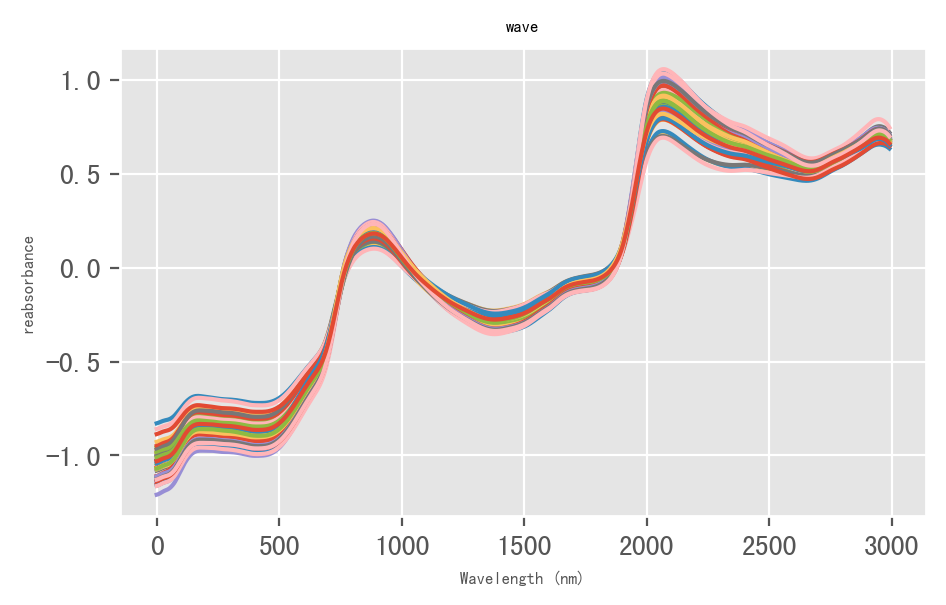

In [9]:
wave = p.wave(X)
p.PlotSpectrum(wave, 'wave', 0, 5).show



### 均值中心化 mean_centralization





<function matplotlib.pyplot.show(close=None, block=None)>

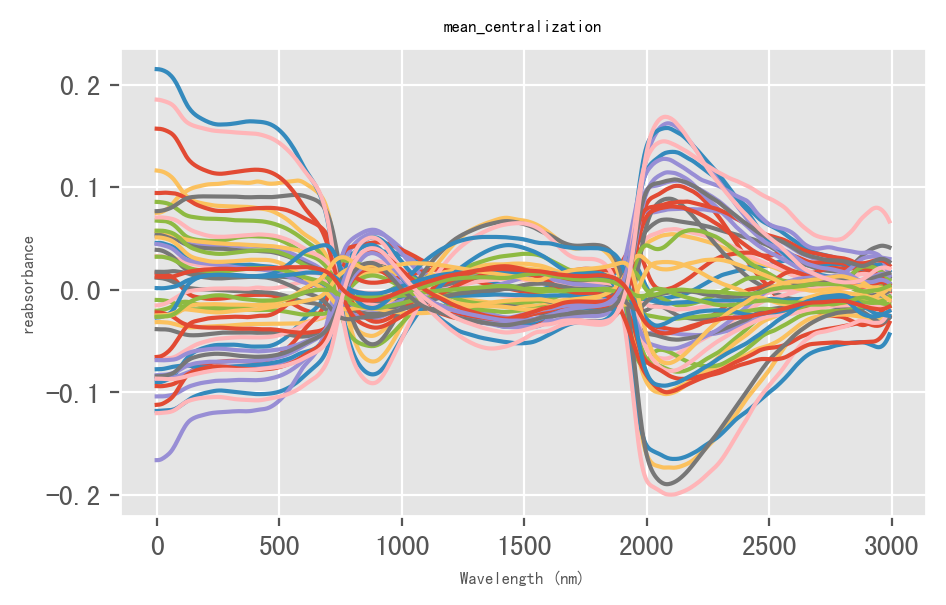

In [10]:
mean_centralization = p.mean_centralization(X)
p.PlotSpectrum(mean_centralization, 'mean_centralization', 0, 5).show



### 标准化 standardlize




<function matplotlib.pyplot.show(close=None, block=None)>

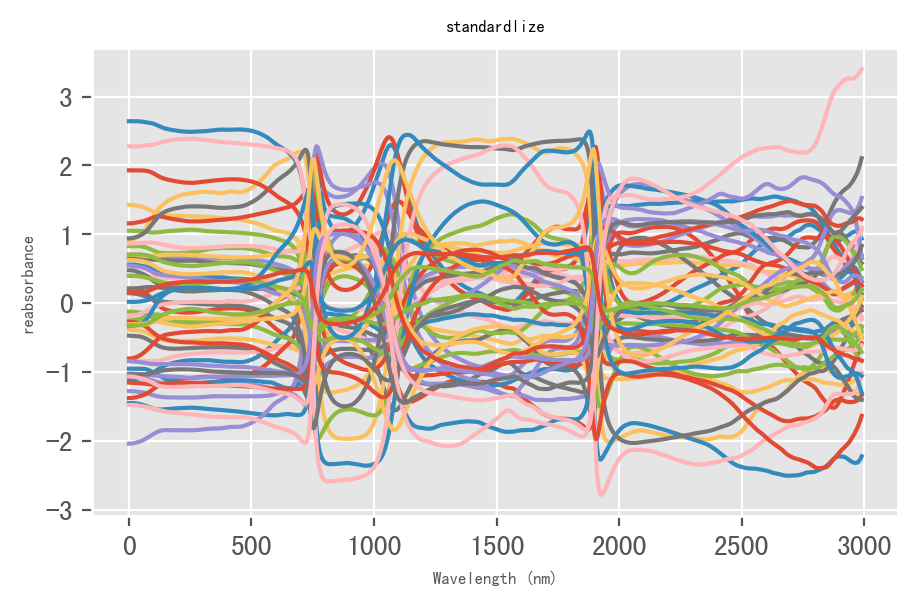

In [11]:
standardlize = p.standardlize(X)
p.PlotSpectrum(standardlize, 'standardlize', 0, 5).show




### 最大最小归一化 max_min_normalization





<function matplotlib.pyplot.show(close=None, block=None)>

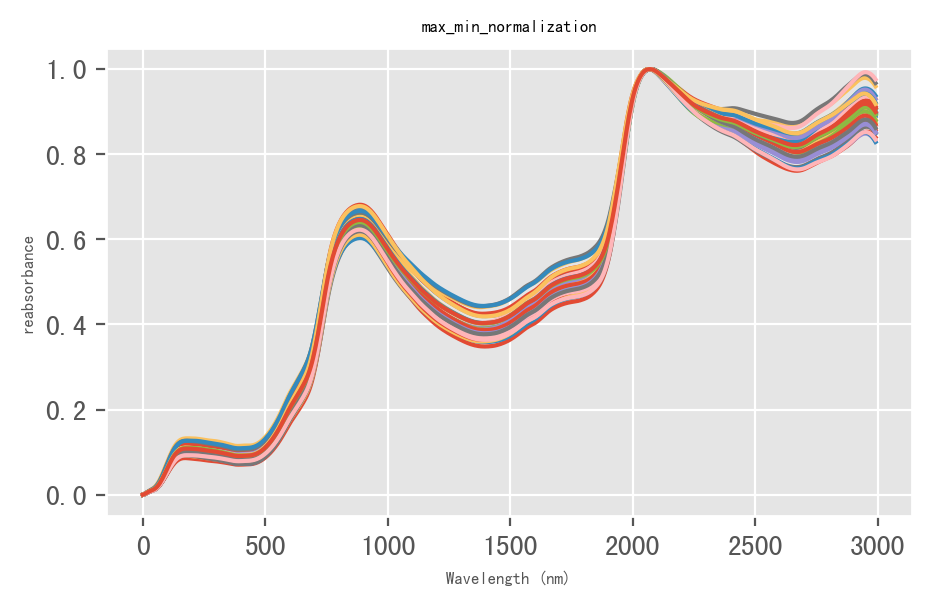

In [12]:
max_min_normalization = p.max_min_normalization(X)
p.PlotSpectrum(max_min_normalization, 'max_min_normalization', 0, 5).show

### 矢量归一化 vector_normalization

<function matplotlib.pyplot.show(close=None, block=None)>

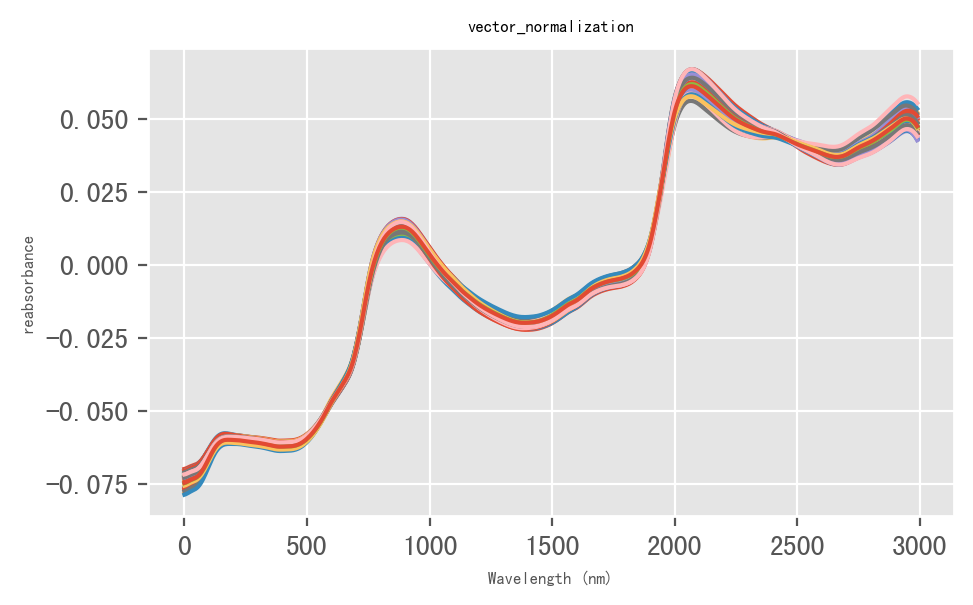

In [13]:
vector_normalization = p.vector_normalization(X)
p.PlotSpectrum(vector_normalization, 'vector_normalization', 0, 5).show